Snapshot tables for Comp257 Project

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile
from matplotlib.pyplot import figure

In [2]:
#Removing warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Data cleaning for State Residence

In [3]:
StateResidence = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 0 )
StateResidence.head()

,Year,State,Population
0,1966,New South Wales,4237900
1,1991,New South Wales,5714974
2,2006,New South Wales,6549174
3,2011,New South Wales,6917656
4,2016,New South Wales,7480228


In [4]:
StateResidence.dtypes

Year           int64
State         object
Population     int64
dtype: object

In [5]:
SR_clean = StateResidence[StateResidence.State != 'Total']

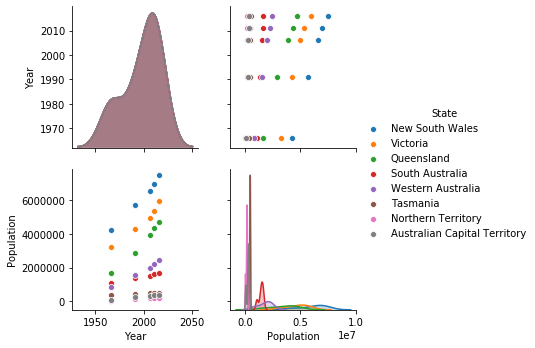

In [6]:
g = sns.pairplot(SR_clean, hue= 'State')

### Data cleaning for Age Sex table

In [7]:
AgeSex = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 2 )
AgeSex.head()

,Year,Gender,Age Group,Number
0,2011,Males,0-4 years,729969
1,2011,Males,5-9 years,694561
2,2011,Males,10-14 years,703308
3,2011,Males,15-19 years,722378
4,2011,Males,20-24 years,741120


In [8]:
AgeSex.columns

Index(['Year', 'Gender', 'Age Group', 'Number'], dtype='object')

In [9]:
AgeSex.rename(columns={'Age Group':'Age_Group'},inplace=True)

In [10]:
AS_clean  = AgeSex[AgeSex.Age_Group != 'Total']
AS_clean.shape


(108, 4)

In [11]:
AS_clean.dtypes

Year          int64
Gender       object
Age_Group    object
Number        int64
dtype: object

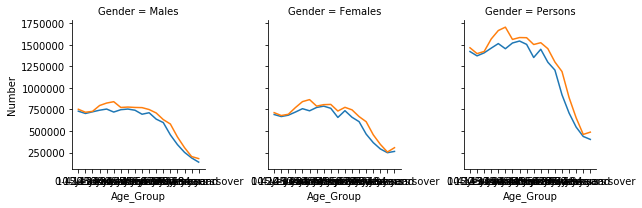

In [12]:
g = sns.FacetGrid(AS_clean,col ='Gender',hue='Year')
g.map(sns.lineplot,'Age_Group','Number')

### Data cleaning for Indigenous Status and State and Territory of Usual residence

In [13]:
IngeniseStat = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 4 )
IngeniseStat.head()

,Age,Year,Aboriginal and Torres Strait Islander people(b),Non-Indigenous people,Indigenous status not stated,Total
0,Median age,2011,21,38,36,37
1,0-4 years,2011,67416,1282736,70897,1421050
2,5-9 years,2011,64936,1222114,64873,1351921
3,10-14 years,2011,64737,1241796,64529,1371054
4,15-19 years,2011,59200,1282020,64577,1405798


In [14]:
IngeniseStat.rename(columns={'Aboriginal and Torres Strait Islander people(b)':'Indigenous'},inplace=True)

In [15]:
IngeniseStat.rename(columns={'Non-Indigenous people':'Non-Indigenous'},inplace=True)

In [16]:
IngeniseStat.rename(columns={'Indigenous status not stated':'Not_Stated'},inplace=True)

In [17]:
IS_clean = IngeniseStat[IngeniseStat.Age !='Median age']

In [18]:
IS_clean.head(10)

,Age,Year,Indigenous,Non-Indigenous,Not_Stated,Total
1,0-4 years,2011,67416,1282736,70897,1421050
2,5-9 years,2011,64936,1222114,64873,1351921
3,10-14 years,2011,64737,1241796,64529,1371054
4,15-19 years,2011,59200,1282020,64577,1405798
5,20-24 years,2011,46454,1333621,80599,1460674
6,25-29 years,2011,38803,1387923,86513,1513236
7,30-34 years,2011,33003,1345765,75012,1453775
8,35-39 years,2011,34074,1414171,71895,1520138
9,40-44 years,2011,33605,1438347,70928,1542879
10,45-49 years,2011,28820,1407494,67831,1504143


graphs needed

### Data cleaning for Country

In [19]:
country = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 6 )
country.head()

,Area,New South Wales,Victoria,Queensland,South Australia,Western Australia,Tasmania,Northern Territory,Australian Capital Territory
0,Adelie Land (France),0,0,0,0,0,0,0,0
1,Argentinian Antarctic Territory,0,0,0,0,0,0,0,0
2,"Australia (includes External Territories), nfd",0,0,0,0,0,0,0,0
3,Australian Antarctic Territory,0,4,4,0,0,0,0,0
4,"Australian External Territories, nec",0,0,0,0,0,0,0,0


In [20]:
country.columns

Index(['Area', 'New South Wales', 'Victoria', 'Queensland', 'South Australia',
       'Western Australia', 'Tasmania', 'Northern Territory',
       'Australian Capital Territory'],
      dtype='object')

In [46]:
country.shape

(292, 9)

In [21]:
country.rename(columns={'New South Wales':'NSW',
                        'Victoria':'VIC',
                        'Queensland':'QLD',
                        'South Australia':'SA',
                        'Western Australia':'WA',
                        'Tasmania':'TAS',
                        'Northern Territory':'NT',
                        'Australian Capital Territory':'ACT'},
              inplace=True)

In [22]:
country.columns

Index(['Area', 'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'], dtype='object')

In [23]:
country_clean = country[country.Area != 'Australia']
country_clean = country_clean[country_clean.Area != 'Not stated']

In [30]:
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1440x1280 with 0 Axes>

<Figure size 1440x1280 with 0 Axes>

In [52]:
NSW_CC = country_clean
NSW_CC = NSW_CC.drop(['VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'],axis = 1)
NSW_CC = NSW_CC[NSW_CC.NSW !=0]
NSW_CC.describe()

,NSW
count,261.000000
mean,7940.839080
std,25460.656098
min,3.000000
25%,38.000000
50%,327.000000
75%,5093.000000
max,234508.000000


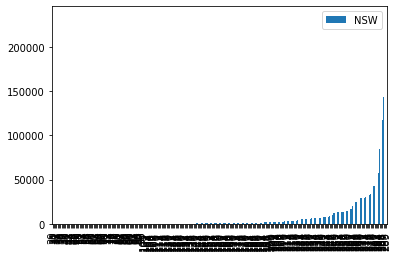

In [50]:
NSW_CC.plot.bar()

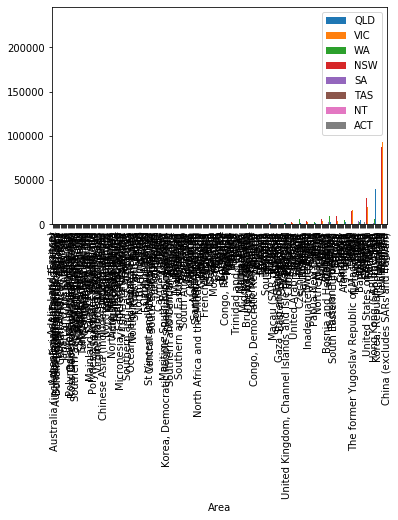

In [53]:
country_clean.plot.bar('Area',{'NSW', 'VIC', 'QLD', 'SA', 'WA', 'TAS', 'NT', 'ACT'})

In [54]:
country.describe()

,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
count,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,292.000000,292.000000,292.000000
mean,2.561719e+04,2.029664e+04,1.610693e+04,5.742110e+03,8.474007e+03,1746.280822,783.619863,1360.842466
std,2.886936e+05,2.266803e+05,1.971260e+05,7.022368e+04,8.881068e+04,24187.295488,9347.358154,15880.928684
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.725000e+01,1.175000e+01,1.100000e+01,0.000000e+00,6.000000e+00,0.000000,0.000000,0.000000
50%,2.265000e+02,1.700000e+02,1.495000e+02,4.700000e+01,9.400000e+01,6.000000,5.500000,12.000000
75%,3.573000e+03,2.738750e+03,1.351250e+03,5.440000e+02,1.104000e+03,80.250000,49.250000,204.500000
max,4.899090e+06,3.845493e+06,3.343657e+06,1.192546e+06,1.492842e+06,411490.000000,157531.000000,270033.000000


### Data cleaning for House Composition

In [55]:
HouseCompos = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 10 )
HouseCompos.head(10)

,State,One family households,Multiple family households,Total family households,Group households,Lone person households,Total households,Year
0,New South Wales,1426810,16745,1443555,88566,386439,1918560,1991
1,Victoria,1072422,10423,1082845,62427,290091,1435363,1991
2,Queensland,728631,6405,735036,47018,182389,964443,1991
3,South Australia,370091,2284,372375,19093,110432,501900,1991
4,Western Australia,396766,2979,399745,25134,103484,528363,1991
5,Tasmania,118725,750,119475,5192,34150,158817,1991
6,Northern Territory,32130,1529,33659,3279,7678,44616,1991
7,Australian Capital Territory,68686,510,69196,5352,15710,90258,1991
8,New South Wales,1811533,62994,1874524,109004,620778,2604314,2016
9,Victoria,1459760,35531,1495290,95588,521828,2112706,2016


In [56]:
HouseCompos.columns

Index(['State', 'One family households', 'Multiple family households',
       'Total family households', 'Group households', 'Lone person households',
       'Total households', 'Year'],
      dtype='object')

In [57]:
HouseCompos.rename(columns={'One family households':'Single_family',
                            'Multiple family households':'Multiple_family',
                            'Total family households':'Total_family_households',
                            'Group households':'Group_households',
                            'Lone person households':'Lone_person_households',
                            'Total households':'Total_households'},
                  inplace=True)

In [58]:
HouseCompos.columns

Index(['State', 'Single_family', 'Multiple_family', 'Total_family_households',
       'Group_households', 'Lone_person_households', 'Total_households',
       'Year'],
      dtype='object')

In [59]:
HouseCompos.dtypes

State                      object
Single_family               int64
Multiple_family             int64
Total_family_households     int64
Group_households            int64
Lone_person_households      int64
Total_households            int64
Year                        int64
dtype: object

In [60]:
df = HouseCompos[HouseCompos.Year == 1991]
df.plot.bar(x='State',y={'Single_famiy','Multiple_family','Group_households', 'Lone_person_households'})

KeyError: "['Single_famiy'] not in index"

In [62]:
df = HouseCompos[HouseCompos.Year == 2016]
df.plot.bar(x='State',y={'Single_famiy','Multiple_family','Group_households', 'Lone_person_households'})

KeyError: "['Single_famiy'] not in index"

In [63]:
HouseCompos.plot(x='Year',y={'Single_famiy', 'Multiple_family','Group_households', 'Lone_person_households'})

KeyError: "['Single_famiy'] not in index"

### Data cleaning for State and Territory of Enumeration

In [64]:
PreHouse = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 12 )
PreHouse.head()

,State,Average no. of people per household,Year
0,New South Wales,2.8,1991
1,New South Wales,2.6,2016
2,Victoria,2.8,1991
3,Victoria,2.6,2016
4,Queensland,2.8,1991


In [65]:
PreHouse.columns

Index(['State', 'Average no. of people per household', 'Year'], dtype='object')

In [66]:
PreHouse.rename(columns={'Average no. of people per household':'Average_Pre_House'}, inplace=True)

In [67]:
PreHouse.dtypes

State                 object
Average_Pre_House    float64
Year                   int64
dtype: object

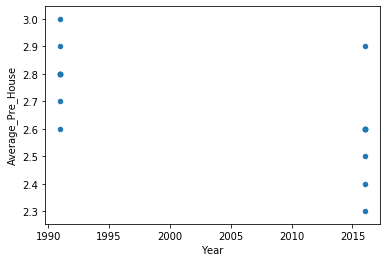

In [68]:
PreHouse.plot.scatter(x = 'Year',y = 'Average_Pre_House')

In [69]:
g= sns.scatterplot(x = 'Year',y = 'Average_Pre_House', hue='State')

ValueError: Could not interpret input 'Year'

In [70]:
FamilyCompos = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 15 )
FamilyCompos.head()

,Unnamed: 0,Year,Couple families with children,Couple families without children,Total
0,Male same-sex couples,2011,502,17081,17583
1,Female same-sex couples,2011,3581,12551,16132
2,Total same-sex couples,2011,4083,29632,33715
3,Opposite-sex couples,2011,2530318,2120670,4650988
4,Male same-sex couples,2016,1067,22676,23741


In [71]:
DewlingStruct = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 17 )
DewlingStruct.head()

,State,Separate house,"Semi-detached, row or terrace house, townhouse etc.",Flat or apartment,Total households,Year
0,Australian Capital Territory,94266,18810,16071,129425,2011
1,Australian Capital Territory,95520,25278,21404,142664,2016
2,New South Wales,1717699,263926,465189,2471299,2011
3,New South Wales,1729820,317447,519380,2604314,2016
4,Northern Territory,41188,6880,10084,60891,2011


### Tenure

In [72]:
Tenure = pd.read_excel("data/snapshot_clean.xlsx", sheet_name = 18 )
Tenure.head()

,State,Owned outright,Owned with a mortgage,Rented,Total Dwellings,year
0,Australian Capital Territory,22770,35190,29771,90258,1991
1,Australian Capital Territory,38555,54832,45346,142664,2016
2,New South Wales,818215,487459,525542,1918560,1991
3,New South Wales,839665,840004,826922,2604314,2016
4,Northern Territory,5867,10788,23682,44616,1991


In [75]:
Tenure.columns

Index(['State', 'Owned outright', 'Owned with a mortgage', 'Rented',
       'Total Dwellings', 'year'],
      dtype='object')

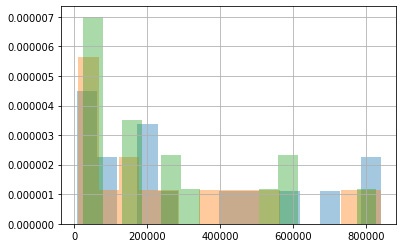

In [101]:
Tenure1 = Tenure[Tenure.year != '1991']
TOO1 = Tenure1['Owned outright']
TOM1 = Tenure1['Owned with a mortgage']
TRE1 = Tenure1['Rented']
TOO1.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TOM1.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TRE1.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)



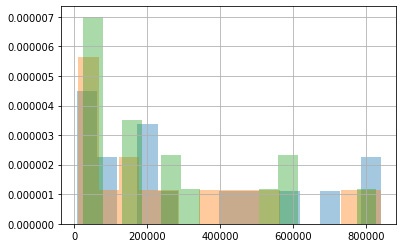

In [102]:
Tenure2 = Tenure[Tenure.year != '2016']
TOO2 = Tenure2['Owned outright']
TOM2 = Tenure2['Owned with a mortgage']
TRE2 = Tenure2['Rented']
TOO2.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TOM2.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)
TRE2.hist(normed = 1, histtype = 'barstacked' ,alpha = 0.4 ,bins = 15)

